# 1. Tải và import thư viện

In [1]:
# !pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp
from keras.models import load_model

# 2. Nhận diện và vẽ keypoints bằng mediapipe holistic

In [2]:
mp_hands = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_hands.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_hands.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_hands.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_hands.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_hands.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
#         ret, frame = cap.read()

#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
#         # Draw landmarks
#         draw_styled_landmarks(image, results)

#         # Show to screen
#         cv2.imshow('OpenCV Feed', image)

#         # Break when type 'q'
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
# len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

# 3. Lấy ra các giá trị keypoints

In [6]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [11]:
# result_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [3]:
# 17*7+7

126

# 4. Thiết lập folder để lấy dữ liệu

In [7]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Data') 

# Actions that we try to detect
actions = np.array(['ban dang lam gi', 'ban di dau the', 'ban hieu ngon ngu ky hieu khong', 'ban hoc lop may',
                    'ban khoe khong', 'ban muon gio roi', 'ban phai canh giac', 'ban ten la gi', 'ban tien bo day',
                    'ban trong cau co the', 'bo me toi cung la nguoi Diec', 'cai nay bao nhieu tien', 
                    'cai nay la cai gi', 'cam on', 'cap cuu', 'chuc mung', 'chung toi giao tiep voi nhau bang ngon ngu ky hieu', 
                    'con yeu me', 'cong viec cua ban la gi', 'hen gap lai cac ban', 'mon nay khong ngon', 'toi bi chong mat', 
                    'toi bi cuop', 'toi bi dau dau', 'toi bi dau hong', 'toi bi ket xe', 'toi bi lac', 'toi bi phan biet doi xu', 
                    'toi cam thay rat hoi hop', 'toi cam thay rat vui', 'toi can an sang', 'toi can di ve sinh', 
                    'toi can gap bac si', 'toi can phien dich', 'toi can thuoc', 'toi dang an sang', 'toi dang buon', 
                    'toi dang o ben xe', 'toi dang o cong vien', 'toi dang phai cach ly', 'toi dang phan van', 'toi di sieu thi', 
                    'toi di toi Ha Noi', 'toi doc kem', 'toi khoi benh roi', 'toi khong dem theo tien', 'toi khong hieu', 
                    'toi khong quan tam', 'toi la hoc sinh', 'toi la nguoi Diec', 'toi la tho theu', 'toi lam viec o cua hang', 
                    'toi nham dia chi', 'toi song o Ha Noi', 'toi thay doi bung', 'toi thay nho ban', 'toi thich an mi', 
                    'toi thich phim truyen', 'toi viet kem', 'xin chao'])

# Thirty videos worth of data
no_sequences = 60

# Videos are going to be 30 frames in length
sequence_length = 60

In [ ]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [8]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Lấy các giá trị keypoints để train và test

In [35]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_hands.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences aka videos
#         for sequence in range(no_sequences):
#             # Loop through video length aka sequence length
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)
# #                 print(results)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)
                
#                 # NEW Apply wait logic
#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(2000)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                    
#     cap.release()
#     cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Xử lý dữ liệu và gắn label

In [9]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical



In [10]:
label_map = {label:num for num, label in enumerate(actions)}

In [11]:
label_map

{'ban dang lam gi': 0,
 'ban di dau the': 1,
 'ban hieu ngon ngu ky hieu khong': 2,
 'ban hoc lop may': 3,
 'ban khoe khong': 4,
 'ban muon gio roi': 5,
 'ban phai canh giac': 6,
 'ban ten la gi': 7,
 'ban tien bo day': 8,
 'ban trong cau co the': 9,
 'bo me toi cung la nguoi Diec': 10,
 'cai nay bao nhieu tien': 11,
 'cai nay la cai gi': 12,
 'cam on': 13,
 'cap cuu': 14,
 'chuc mung': 15,
 'chung toi giao tiep voi nhau bang ngon ngu ky hieu': 16,
 'con yeu me': 17,
 'cong viec cua ban la gi': 18,
 'hen gap lai cac ban': 19,
 'mon nay khong ngon': 20,
 'toi bi chong mat': 21,
 'toi bi cuop': 22,
 'toi bi dau dau': 23,
 'toi bi dau hong': 24,
 'toi bi ket xe': 25,
 'toi bi lac': 26,
 'toi bi phan biet doi xu': 27,
 'toi cam thay rat hoi hop': 28,
 'toi cam thay rat vui': 29,
 'toi can an sang': 30,
 'toi can di ve sinh': 31,
 'toi can gap bac si': 32,
 'toi can phien dich': 33,
 'toi can thuoc': 34,
 'toi dang an sang': 35,
 'toi dang buon': 36,
 'toi dang o ben xe': 37,
 'toi dang o c

In [12]:
sequences, labels = [], [] #gán nhãn
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [13]:
print(actions.shape[0])

60


In [14]:
np.array(sequences).shape

(3600, 60, 126)

In [15]:
np.array(labels).shape

(3600,)

In [13]:
X = np.array(sequences)

In [17]:
X.shape

(3600, 60, 126)

In [14]:
y = to_categorical(labels).astype(int)

In [15]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #chia test

In [17]:
X_train.shape

(2880, 60, 126)

In [64]:
X_test.shape

(720, 60, 126)

In [65]:
y_test.shape

(720, 60)

# 7. Xây dựng và train LSTM Neural Network

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

In [17]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [64]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(60,126))) # 64
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))


#Chỉnh sửa cấu trúc

model = Sequential()
model.add(LSTM(48, return_sequences=True, activation='relu', input_shape=(60,126))) # 64
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))





In [40]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
# model.fit(X_train, y_train, initial_epoch=33, epochs=500, callbacks=[tb_callback])

In [41]:
model.fit(X_train, y_train, initial_epoch=151, epochs=200, callbacks=[tb_callback]) #train model


Epoch 152/200
90/90 [==============================] - 19s 146ms/step - loss: 0.4508 - categorical_accuracy: 0.8688
Epoch 153/200
90/90 [==============================] - 12s 134ms/step - loss: 0.2118 - categorical_accuracy: 0.9398
Epoch 154/200
90/90 [==============================] - 11s 122ms/step - loss: 0.4026 - categorical_accuracy: 0.8829
Epoch 155/200
90/90 [==============================] - 12s 128ms/step - loss: 0.1326 - categorical_accuracy: 0.9558
Epoch 156/200
90/90 [==============================] - 11s 125ms/step - loss: 0.2614 - categorical_accuracy: 0.9151
Epoch 157/200
90/90 [==============================] - 11s 124ms/step - loss: 0.1565 - categorical_accuracy: 0.9502
Epoch 158/200
90/90 [==============================] - 11s 123ms/step - loss: 0.1258 - categorical_accuracy: 0.9575
Epoch 159/200
90/90 [==============================] - 10s 111ms/step - loss: 0.1824 - categorical_accuracy: 0.9334
Epoch 160/200
90/90 [==============================] - 10s 111ms/step - 

KeyboardInterrupt: 

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 32)            20352     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 128)           82432     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                1980      
Total params: 160,412
Trainable params: 160,412
Non-trainable params: 0
__________________________________________________

# 8. Save Weights

In [37]:
model.save('97,5.h5') #lưu model, trong ngoặc là tên model

In [38]:
del model #xóa model

In [18]:
# model.load_weights('Structure/Structure 5/85,139.h5') # main

NameError: name 'model' is not defined

In [16]:
model = load_model('Structure/Structure 5 (final)/94,58.h5') #load model, trong ngoặc là path

# 9. Ước lượng bằng Confusion Matrix

In [17]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [18]:
yhat = model.predict(X_test)

In [19]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [20]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[712,   0],
        [  0,   8]],

       [[714,   0],
        [  1,   5]],

       [[708,   0],
        [  0,  12]],

       [[710,   0],
        [  0,  10]],

       [[709,   0],
        [  0,  11]],

       [[713,   0],
        [  0,   7]],

       [[712,   0],
        [  0,   8]],

       [[707,   0],
        [  0,  13]],

       [[707,   1],
        [  0,  12]],

       [[705,   0],
        [  0,  15]],

       [[709,   0],
        [  0,  11]],

       [[708,   0],
        [  0,  12]],

       [[705,   0],
        [  0,  15]],

       [[709,   0],
        [  0,  11]],

       [[711,   0],
        [  0,   9]],

       [[708,   0],
        [  0,  12]],

       [[708,   0],
        [  0,  12]],

       [[706,   0],
        [  0,  14]],

       [[708,   0],
        [  0,  12]],

       [[709,   0],
        [  1,  10]],

       [[707,   0],
        [  1,  12]],

       [[709,   0],
        [  0,  11]],

       [[706,   0],
        [  0,  14]],

       [[711,   0],
        [  0, 

In [21]:
accuracy_score(ytrue, yhat)

0.9916666666666667

In [23]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(ytrue, yhat)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[ 8  0  0 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 14  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 11]]


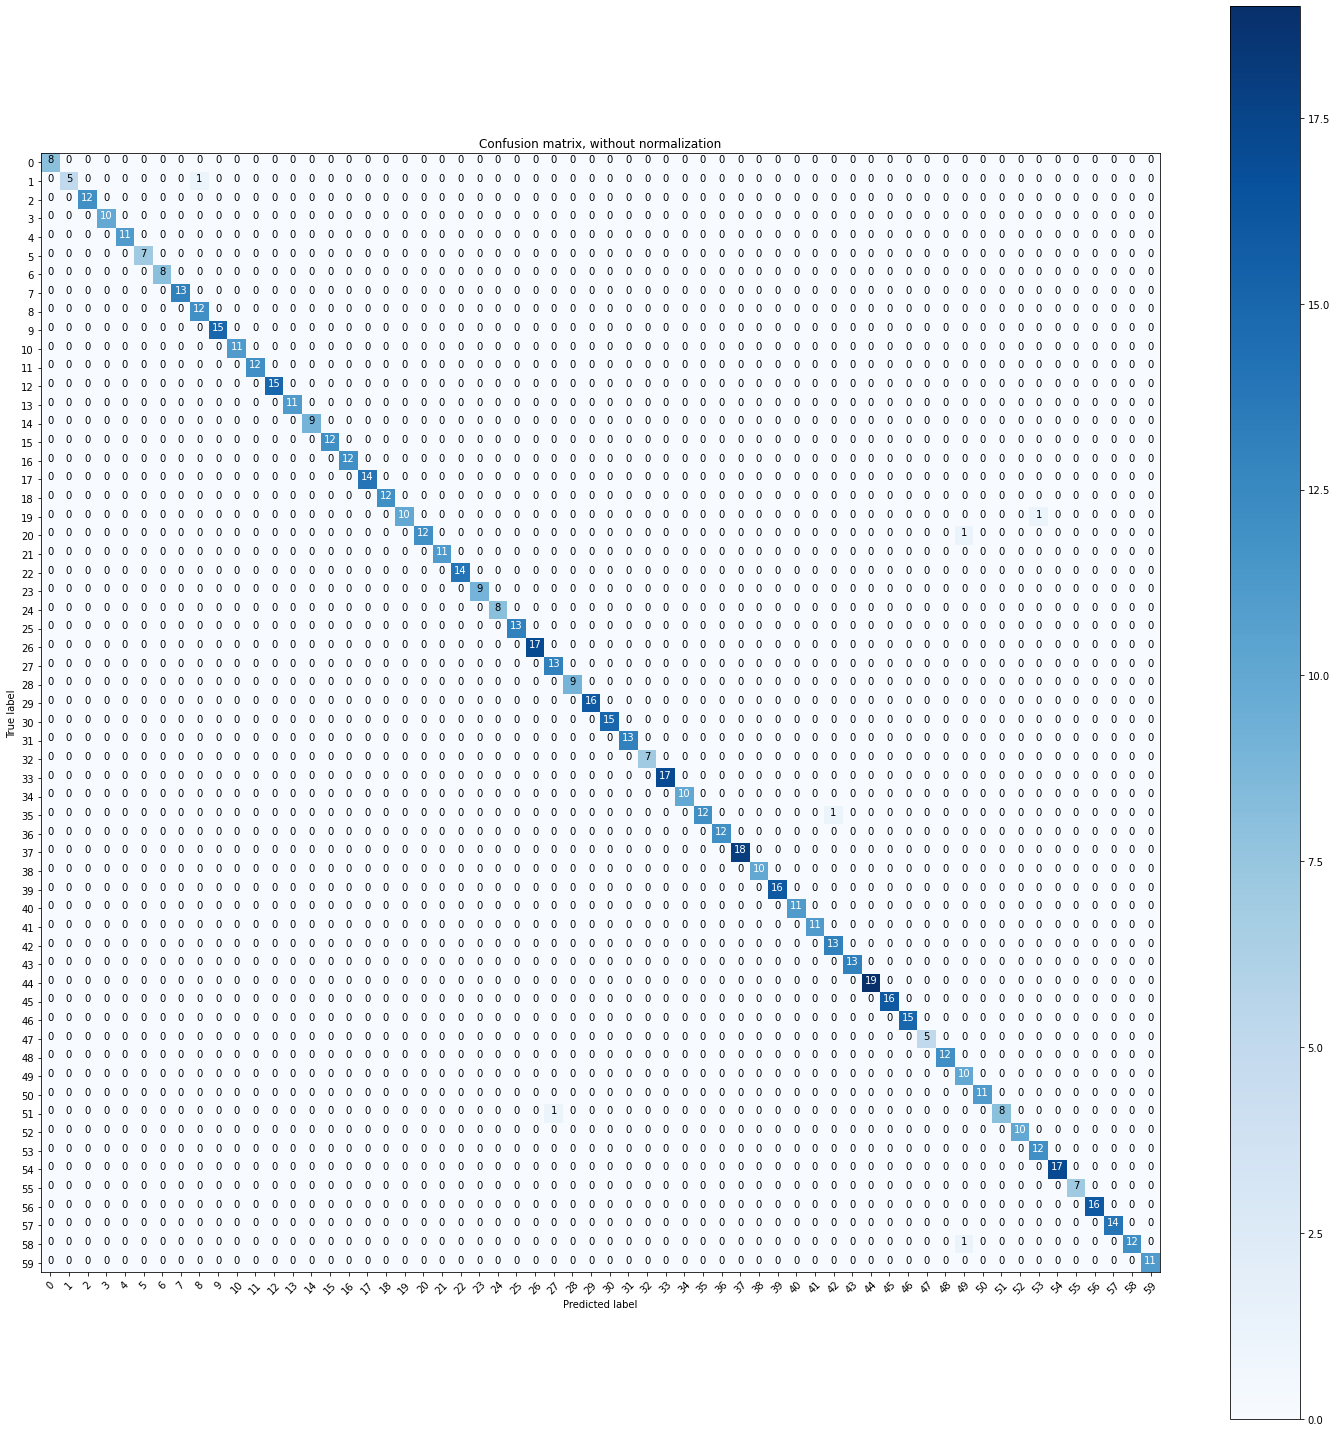

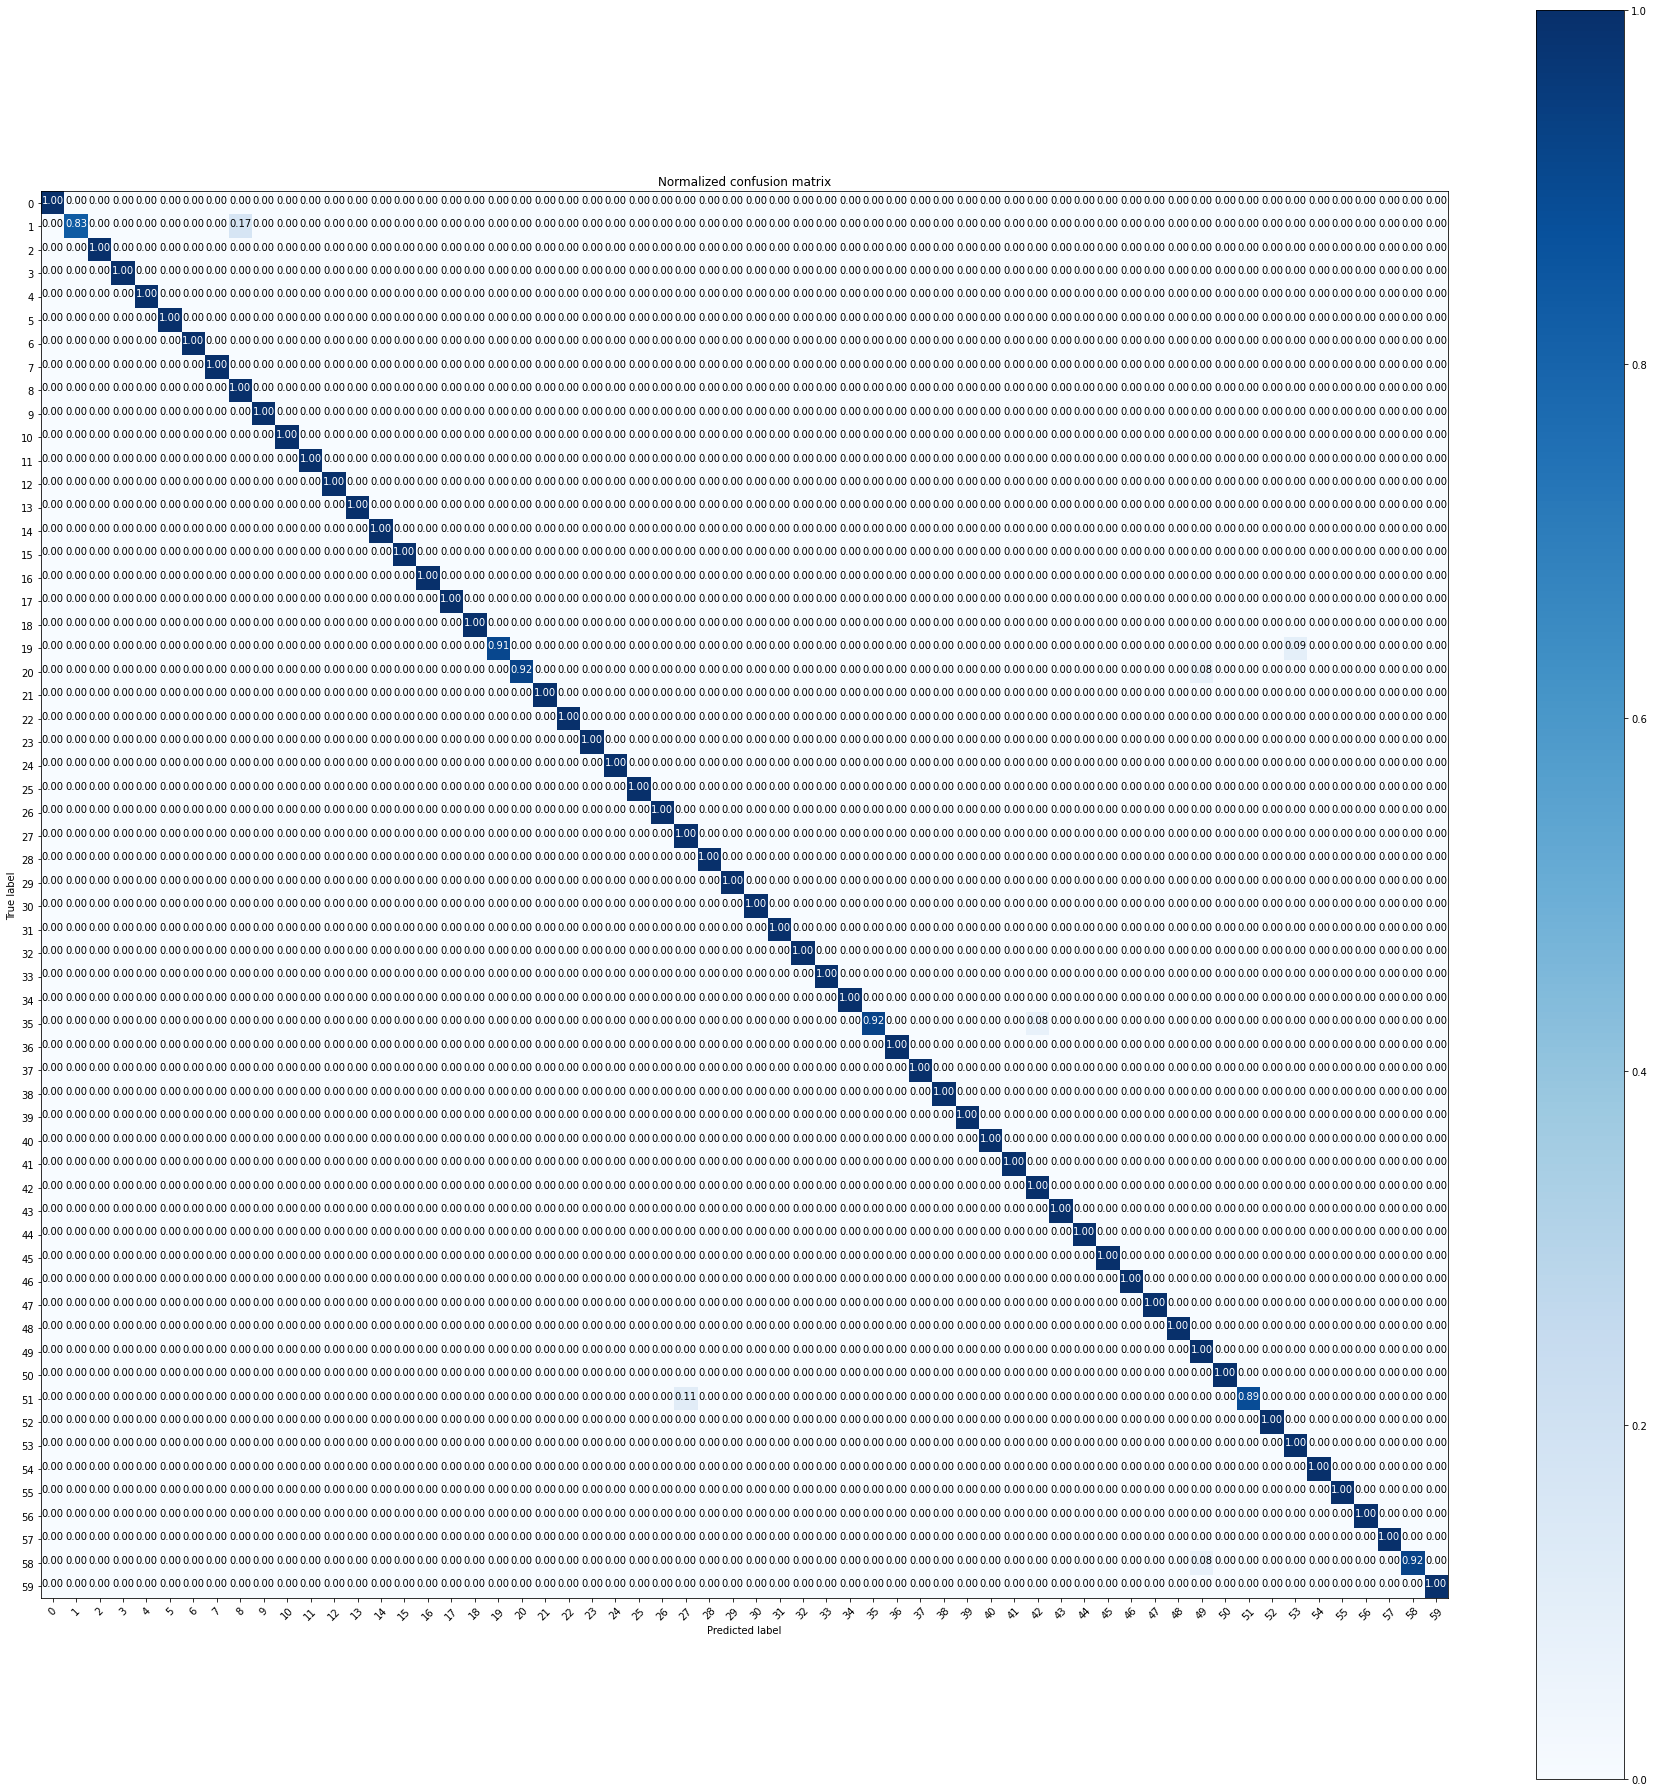

In [24]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
plt.figure(figsize = (20, 20))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize = (25, 25))
# plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# 11. Test 

In [112]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [100]:
import time

In [39]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'image' is not defined

<Figure size 1296x1296 with 0 Axes>

In [100]:
sequence.reverse()

In [102]:
len(sequence)

30

In [103]:
sequence.append('def')

In [109]:
model.evaluate(X_test, y_test, verbose=1)

2/2 [==============================] - 1s 27ms/step - loss: 0.4509 - categorical_accuracy: 0.9833


[0.4509377181529999, 0.9833333492279053]

In [104]:
sequence.reverse()

In [105]:
sequence[-30:]

[array([ 0.62733257,  0.44471735, -0.69024068, ...,  0.40363967,
         0.28696212, -0.06274992]),
 array([ 0.62688404,  0.4438577 , -0.73676074, ...,  0.40629318,
         0.28771287, -0.05781016]),
 array([ 0.62661999,  0.44294813, -0.7216031 , ...,  0.40591961,
         0.28609812, -0.06014785]),
 array([ 0.62655252,  0.44137394, -0.65666282, ...,  0.40555608,
         0.28700155, -0.06166872]),
 array([ 0.6264345 ,  0.43732077, -0.64333224, ...,  0.40387231,
         0.28911069, -0.06399857]),
 array([ 0.6262821 ,  0.43725368, -0.62972653, ...,  0.40475827,
         0.29045084, -0.05971628]),
 array([ 0.6263392 ,  0.43722284, -0.63863361, ...,  0.40456492,
         0.29014641, -0.06776936]),
 array([ 0.62639326,  0.43711936, -0.69808131, ...,  0.40482497,
         0.28957966, -0.06049867]),
 array([ 0.62548095,  0.43673155, -0.58750856, ...,  0.40362868,
         0.29177704, -0.05661049]),
 array([ 0.62491542,  0.43662712, -0.57843322, ...,  0.39947596,
         0.29348499, -0.05

In [31]:
import cv2   
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0) 
# Set mediapipe model 
with mp_hands.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read() # đọc video từ camera

        # Make detections
        image, results = mediapipe_detection(frame, holistic) # gọi biến image và result = giá trị RGB của ảnh
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results) # nhận diện cơ thể 
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results) # xuất ra array các keypoints cơ thể (mấy cái đốt í)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-60:] # Đưa các frame thu đc vào mảng sequence, ở đây t để là 30 frame cuối
        
        if len(sequence) == 60:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)]) # Nếu thu đủ số frame của câu, đưa các array đấy vào model rồi ước lượng ra kết quả chính xác nhất trong dữ liệu
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            # image = prob_viz(res, actions, image, colors)
        
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        if len(sequence) == 60:
            cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [92]:
cap.release()
cv2.destroyAllWindows()

In [43]:
res[np.argmax(res)] > threshold

True

In [ ]:
# (num_sequences,30,1662)

In [45]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0.06465654, 0.2806947 , 0.6546488 ]], dtype=float32)

In [1]:
import tensorflow as tf
keras_model = tf.keras.models.load_model("Models/20sentences933.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT] # sử dụng optimization nếu cần tối ưu thêm
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmprhhjys8n\assets


In [26]:
#SHOW TFLITE MODEL RESULT

import tensorflow as tf
interpreter = tf.lite.Interpreter(model_path="Models/SignModel.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("input details", input_details)
print("ouput details", output_details)

input details [{'name': 'lstm_input', 'index': 0, 'shape': array([   1,   30, 1662]), 'shape_signature': array([  -1,   30, 1662]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
ouput details [{'name': 'Identity', 'index': 75, 'shape': array([1, 3]), 'shape_signature': array([-1,  3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [33]:
# TEST MODEL TFLITE

interpreter = tf.lite.Interpreter(model_path="Models/SignModel.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_data = np.random.rand(1, 30, 1662).astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

boxes = interpreter.get_tensor(output_details[0]['index'])[0]
print(boxes)

[0.74122477 0.2575568  0.00121851]


In [1]:
from tflite_support import flatbuffers
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb



# Creates model info.
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "Sign Language Translation"
model_meta.description = ("Identify the sign language and translate into"
                          "text")
model_meta.version = "v1"
model_meta.author = "khooinguyeen"
model_meta.license = ("Apache License. Version 2.0 "
                      "http://www.apache.org/licenses/LICENSE-2.0.")